# Mapping new ODYM regions to climate locations

5 new regions are introduced in ODYM, and these needs to be mapped to climate locations for building energy simulation. 
## Checking HDD and CDD for RECC regions 

Data on HDD and CDD from: https://www.sciencedirect.com/science/article/pii/S0360544217318388?via%3Dihub#sec4

(temp for calc def at 18C - ok??) 


This notebook is used to check the HDD and CDD of the new ODYM regions. 

For a first simulation, only one location is used per new region and a location representing more or less the average climate is chosen. The following climate locations are used for the first simulation of building energy use in the new regions: 

- R5.2MNF_Other: Egypt (Cairo)
- R5.2SSA_Other: Nigeria (Benin)
- R5.2REF_Other: Russia (Moscow)
- R5.2LAM_Other: Brazil (Rio de Janeiro)  
- R5.2Asia_Other: Indonesia (Jakarta)



In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_excel('HDD_CDD_database.xlsx', skiprows=1)
df.set_index(df.columns[0], inplace=True)
df=df[['t2m.hdd.18.3C', 't2m.cdd.18.3C']]

In [3]:
df

,t2m.hdd.18.3C,t2m.cdd.18.3C
Country Average (1964-2013),,
Albania,2413.034397,419.761699
Algeria,1713.710654,1348.386746
Angola,369.087001,1545.105151
Argentina,1669.885048,861.568356
Armenia,4928.031975,173.686050
...,...,...
Venezuela,2.156550,2278.736197
Vietnam,226.862848,1956.403552
Yemen,184.713750,2775.832948


In [4]:
def plot_scatter(df, list_countries):
    fig, ax = plt.subplots(figsize=(20,10))
    temp = df.T[list_countries].T
    df.T[list_countries].T.plot.scatter(x = 't2m.hdd.18.3C', y='t2m.cdd.18.3C',s=100, ax=ax)

    p1 = sns.regplot(data=temp, x="t2m.hdd.18.3C", y="t2m.cdd.18.3C", fit_reg=False, marker="+", color="skyblue", scatter_kws={'s':400})
    #sns.plt.show()
    ax.set_xlim(0,8000)
    ax.set_ylim(0,4000)
    # add annotations one by one with a loop
    for line in range(0,temp.shape[0]):
        p1.text(temp["t2m.hdd.18.3C"][line]+0.2, temp["t2m.cdd.18.3C"][line], s=temp.index[line], horizontalalignment='left', size='large', color='black', weight='semibold')


In [5]:
africa = ['Algeria',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Chad',
 'Congo',
 'Equatorial Guinea',
 'Eritrea',
 'Ethiopia',
          'Egypt',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea-Bissau',
 'Guinea',
 'Kenya',
 'Lesotho',
 'Liberia',
 'Libya',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'Somalia',
 'South Africa',
    'South Sudan',
 'Sudan',
 'Togo',
 'Tunisia',
 'Uganda',
 'Tanzania',
 'Zambia',
 'Zimbabwe']

lam = ['Argentina',
 'Bolivia',
 'Brazil',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Dominican Rep.',
 'El Salvador',
 'Ecuador',
 'Guatemala',
 'Haiti',
 'Honduras',
 'Nicaragua',
 'Panama',
 'Paraguay',
 'Peru',
 'Uruguay',
 'Venezuela']

me = ['Egypt', 'Iran',
 'Iraq', 'Jordan', 'Kuwait',
 'Lebanon', 'Oman',
 'Palestine', 'Saudi Arabia', 'Syria', 'Yemen', 'United Arab Emirates']

asia = ['Bangladesh', 'Cambodia', 'Indonesia', 'Lao PDR', 'Malaysia', 'Mongolia', 'Myanmar', 'Nepal', 'Pakistan', 'Philippines', 'Sri-Lanka', 'Thailand', 'Vietnam', 'South Korea']

oecd = ['Australia', 'Chile', 'Mexico', 'New Zealand', 'Norway', 'Switzerland','Turkey']

ref = ['Armenia', 'Azerbaijan', 'Belarus', 'Georgia', 'Kazakhstan', 'Kyrgyz Rep.','Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']





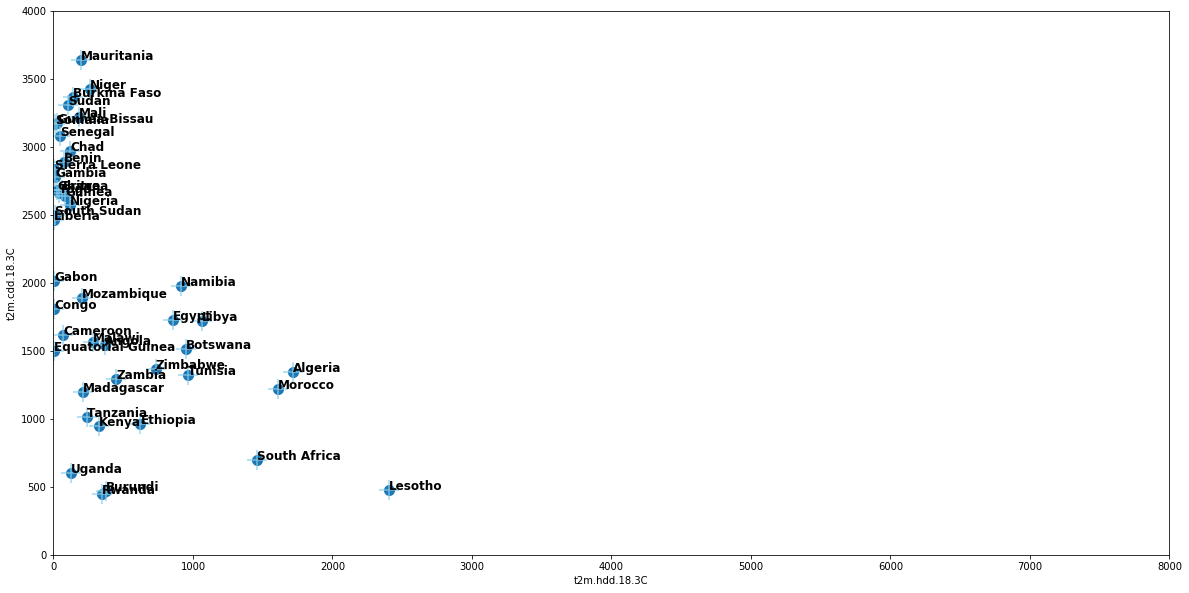

In [6]:
plot_scatter(df,africa)

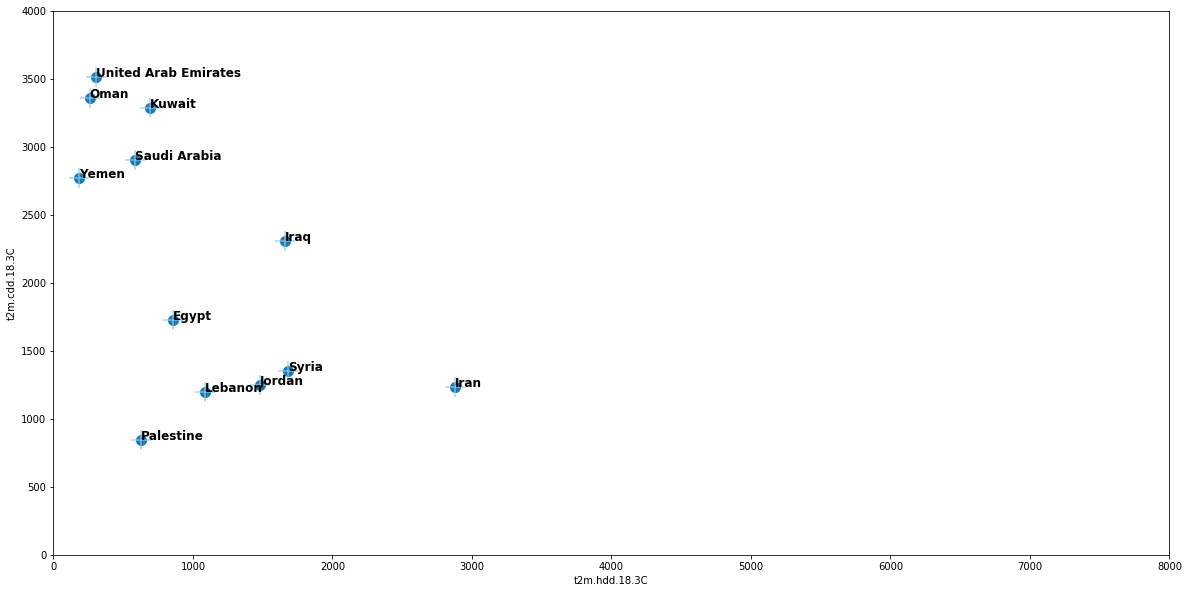

In [7]:
plot_scatter(df,me)

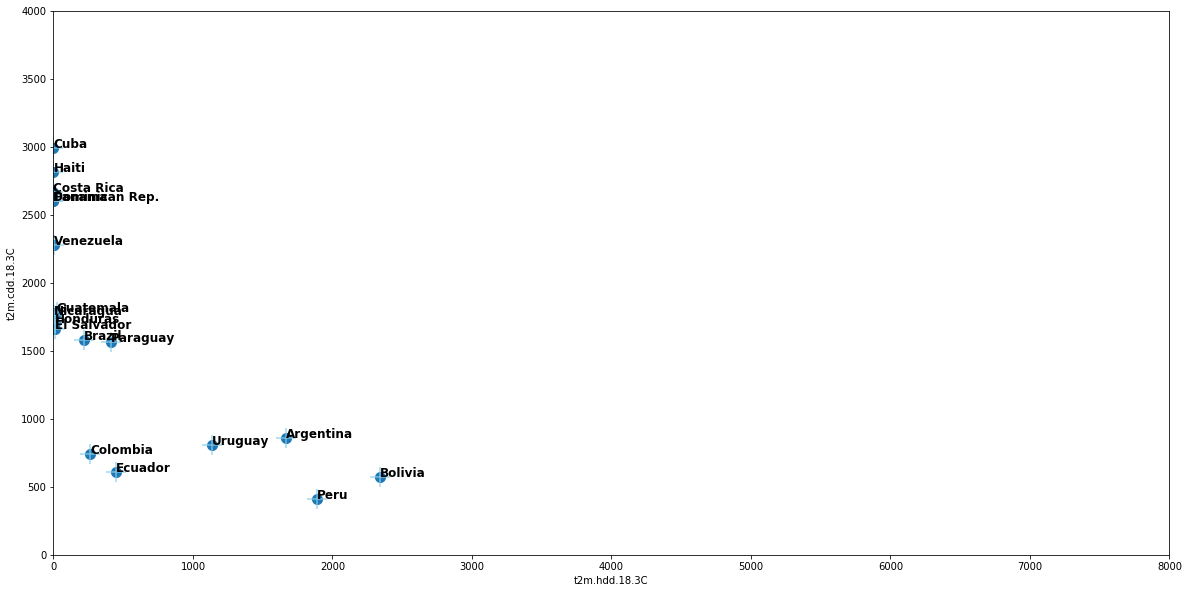

In [8]:
plot_scatter(df,lam)

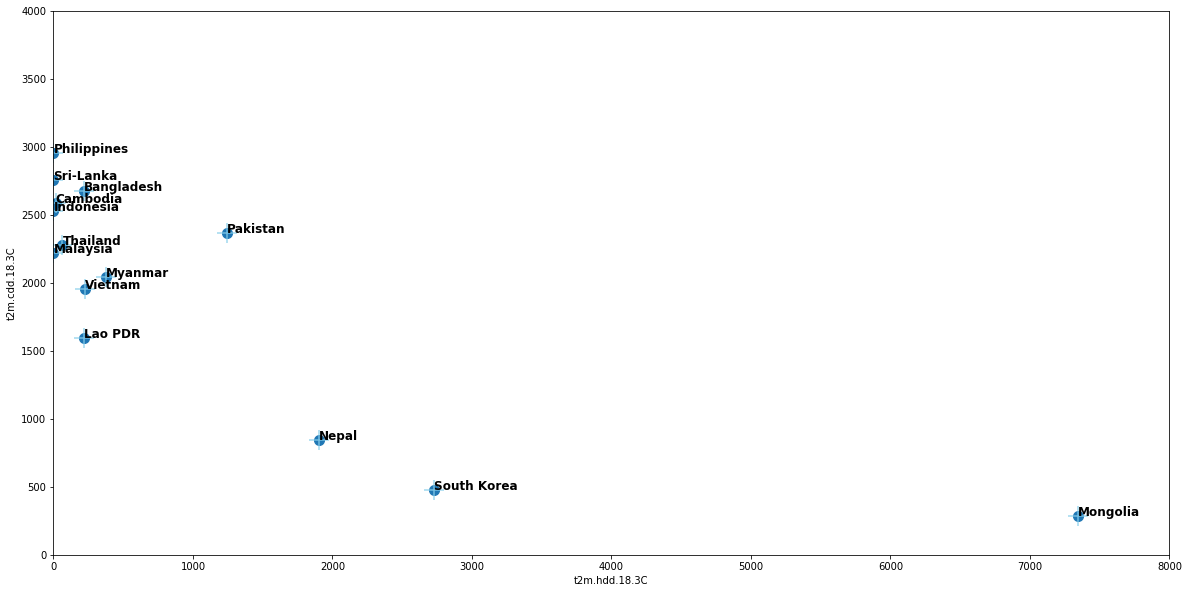

In [9]:
plot_scatter(df,asia)

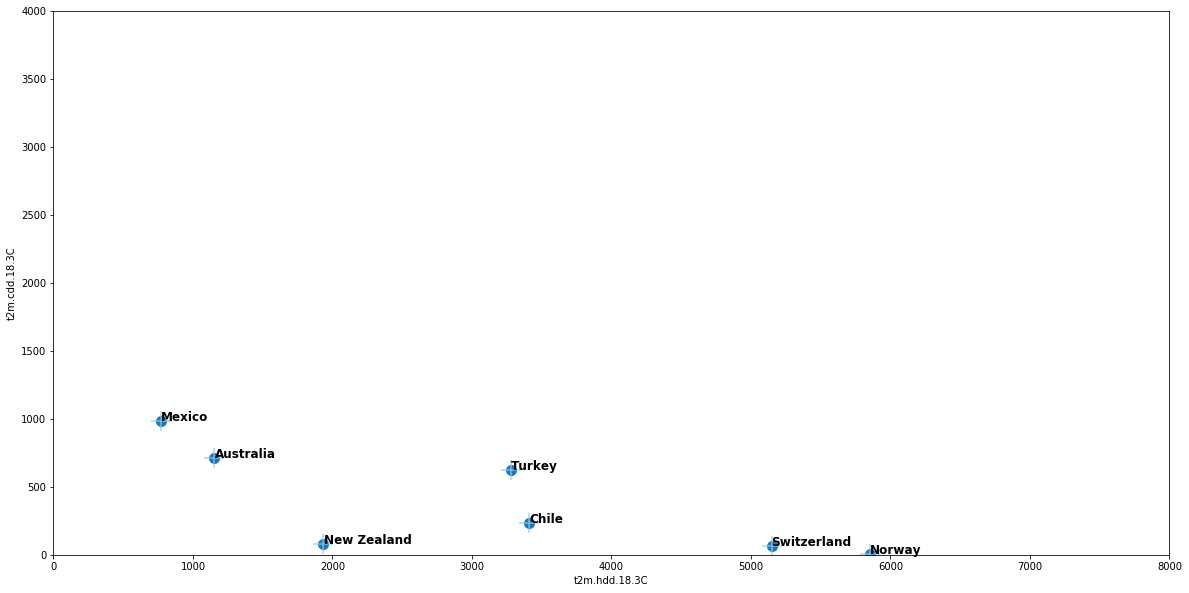

In [10]:
plot_scatter(df,oecd)

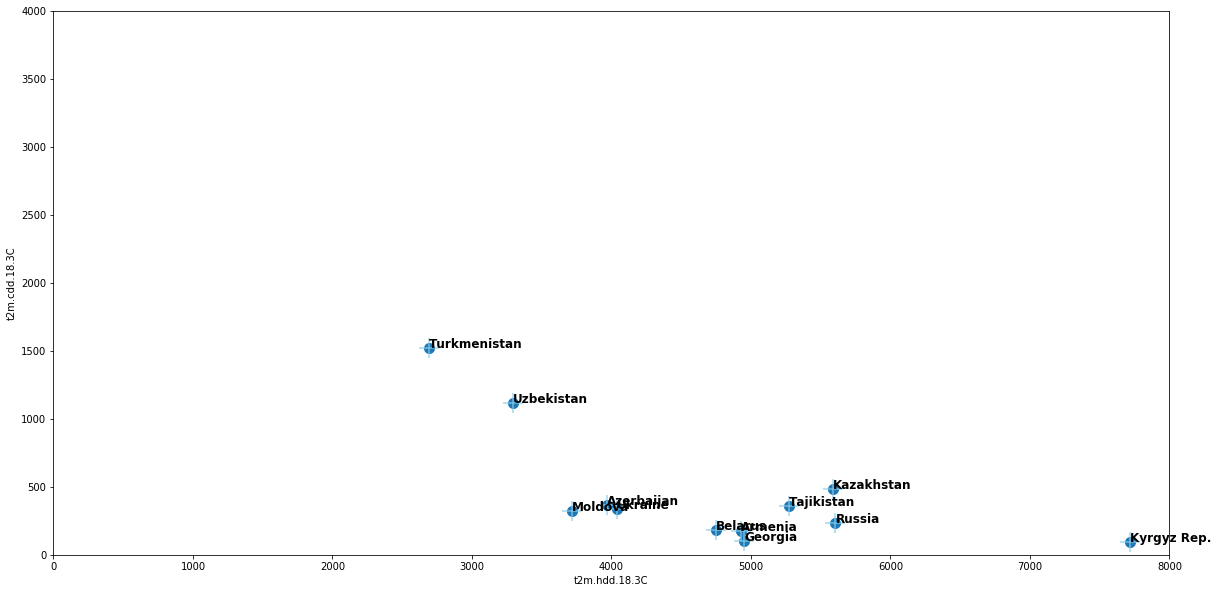

In [11]:
plot_scatter(df,ref)